In [36]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
import scipy.stats as stats 

In [37]:
#get covid test result
df_covid=pd.read_table('../NSinternship/covid19_result_0806.by_eid')

In [38]:
display(df_covid)

,eid,#tests,#positive_test,final_result,final_date
0,1000011,1,0,0,2020/05/11
1,1001244,1,0,0,2020/03/21
2,1001283,1,0,0,2020/06/02
3,1001505,2,0,0,2020/07/10
4,1001772,1,0,0,2020/05/08
...,...,...,...,...,...
13497,6021157,1,0,0,2020/03/27
13498,6022249,1,0,0,2020/07/10
13499,6022684,1,0,0,2020/05/26
13500,6023646,4,0,0,2020/07/06


In [39]:
#get all eids with covid positive test
eid_positive=list(df_covid['eid'][df_covid['final_result']==1])

In [40]:
#total number of subjects with covid positive results
len(eid_positive)

1650

In [41]:
data = pd.read_csv("../NSinternship/Covid_information_20-08-18.csv")

In [42]:
display(data)

,eid,31-0.0,34-0.0,52-0.0,93-0.0,93-0.1,93-1.0,93-1.1,93-2.0,93-2.1,...,100025-0.0,100025-1.0,100025-2.0,100025-3.0,100025-4.0,104670-0.0,104670-1.0,104670-2.0,104670-3.0,104670-4.0
0,1000011,0,1953,8,NaN,NaN,NaN,NaN,NaN,NaN,...,19.73,NaN,5.99,NaN,NaN,0.0,NaN,0.0,NaN,NaN
1,1001244,1,1940,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,16.87,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2,1001283,1,1943,10,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1001505,1,1952,5,150.0,144.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1001772,1,1966,9,NaN,NaN,NaN,NaN,164.0,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13497,6021157,1,1940,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,14.55,NaN,NaN,NaN,NaN,0.0,NaN
13498,6022249,1,1958,3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13499,6022684,1,1965,3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13500,6023646,1,1942,7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Field 31: Sex

In [8]:
sex = data[['eid','31-0.0']]
sex = sex.rename(columns = {'31-0.0': 'Sex'}, inplace = False)
display(sex)

,eid,Sex
0,1000011,0
1,1001244,1
2,1001283,1
3,1001505,1
4,1001772,1
...,...,...
13497,6021157,1
13498,6022249,1
13499,6022684,1
13500,6023646,1


In [9]:
male = sex['Sex'].astype(bool).sum(axis=0)/sex['Sex'].count()
female = 1 - male
print("The percentage of male patients is {} and of female patients is {}".format(male, female))

The percentage of male patients is 0.4870389571915272 and of female patients is 0.5129610428084728


In [10]:
infectionRate_male=sex['eid'][sex['eid'].isin(eid_positive)][sex['Sex']==1].count()/sex['eid'][sex['Sex']==1].count()
infectionRate_female=sex['eid'][sex['eid'].isin(eid_positive)][sex['Sex']==0].count()/sex['eid'][sex['Sex']==0].count()
print("The infection rage in male subject is {} and in female subjects is {}".format(infectionRate_male, infectionRate_female))

The infection rage in male subject is 0.13108272506082724 and in female subjects is 0.11377418423332371


In [11]:
numberPositive_male=sex['eid'][sex['eid'].isin(eid_positive)][sex['Sex']==1].count()
numberNegative_male=sex['eid'][~sex['eid'].isin(eid_positive)][sex['Sex']==1].count()
numberPositive_female=sex['eid'][sex['eid'].isin(eid_positive)][sex['Sex']==0].count()
numberNegative_female=sex['eid'][~sex['eid'].isin(eid_positive)][sex['Sex']==0].count()
odd, p = stats.fisher_exact([[numberPositive_male, numberNegative_male], [numberPositive_female, numberNegative_female]])

print('Gender\tpositive\tnegative')
print('Male\t{}      \t{}'.format(numberPositive_male,numberNegative_male))
print('feMale\t{}      \t{}'.format(numberPositive_female,numberNegative_female))
print('The odd ration of infection in male to infection in female is {} and p value is {}'.format(odd,p))

Gender	positive	negative
Male	862      	5714
feMale	788      	6138
The odd ration of infection in male to infection in female is 1.1750807083501382 and p value is 0.002288659054526205


### Data Field 34: Age

In [12]:
bday = data[['eid','34-0.0', '52-0.0']]
bday = bday.rename(columns = {'34-0.0': 'Year', '52-0.0': 'Month'}, inplace = False)
display(bday)

,eid,Year,Month
0,1000011,1953,8
1,1001244,1940,1
2,1001283,1943,10
3,1001505,1952,5
4,1001772,1966,9
...,...,...,...
13497,6021157,1940,1
13498,6022249,1958,3
13499,6022684,1965,3
13500,6023646,1942,7


In [13]:
bday['Date'] = pd.to_datetime(bday[['Year', 'Month']].assign(DAY=1)) # ignoring the date and default as 1
display(bday)

,eid,Year,Month,Date
0,1000011,1953,8,1953-08-01
1,1001244,1940,1,1940-01-01
2,1001283,1943,10,1943-10-01
3,1001505,1952,5,1952-05-01
4,1001772,1966,9,1966-09-01
...,...,...,...,...
13497,6021157,1940,1,1940-01-01
13498,6022249,1958,3,1958-03-01
13499,6022684,1965,3,1965-03-01
13500,6023646,1942,7,1942-07-01


In [14]:
from datetime import datetime
from datetime import date

def calculate_age(birth):
    birth = datetime.strptime(birth, "%Y-%m-%d").date()
    today = date.today()
    if birth.month > today.month:
        age = today.year - birth.year - 1
    else: 
        age = today.year - birth.year
    return age

bday['Date'] = bday.Date.dt.strftime("%Y-%m-%d")
bday['Age'] = bday['Date'].apply(calculate_age)
display(bday)

,eid,Year,Month,Date,Age
0,1000011,1953,8,1953-08-01,67
1,1001244,1940,1,1940-01-01,80
2,1001283,1943,10,1943-10-01,76
3,1001505,1952,5,1952-05-01,68
4,1001772,1966,9,1966-09-01,53
...,...,...,...,...,...
13497,6021157,1940,1,1940-01-01,80
13498,6022249,1958,3,1958-03-01,62
13499,6022684,1965,3,1965-03-01,55
13500,6023646,1942,7,1942-07-01,78


In [15]:
np.average(bday['Age'])

69.30284402310768

The average age of all the patients is 69.30284402310768
The average age of covid positive patients is 67.71030303030302
The average age of covid negative patients is 69.52455281808977


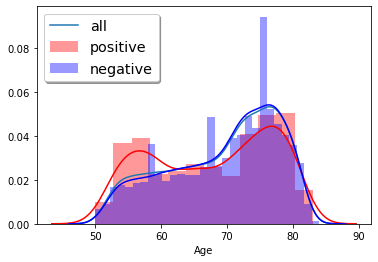

<Figure size 432x288 with 0 Axes>

In [63]:
print("The average age of all the patients is {}".format(np.average(bday['Age'])))
print("The average age of covid positive patients is {}".format(np.average(bday['Age'][bday['eid'].isin(eid_positive)])))
print("The average age of covid negative patients is {}".format(np.average(bday['Age'][~bday['eid'].isin(eid_positive)])))
ax=sns.distplot(bday['Age'],label='all',hist=False)
ax=sns.distplot(bday['Age'][bday['eid'].isin(eid_positive)], color='red',label='positive',hist=True)
ax=sns.distplot(bday['Age'][~bday['eid'].isin(eid_positive)],color='blue',label='negative',hist=True)
legend = ax.legend(loc='upper left', shadow=True, fontsize='x-large')

plt.show()
plt.savefig("Covid_information_age_distribution.png")
# From the plot, the patients' ages are mostly centered around 70-80.

In [17]:
#compare infection rate in different decades (divided into three grups, <60, 60-70, >=70)
numberPositive_less60=bday['Age'][bday['eid'].isin(eid_positive)][bday['Age']<60].count()
numberNegative_less60=bday['Age'][~bday['eid'].isin(eid_positive)][bday['Age']<60].count()
numberPositive_less70=bday['Age'][bday['eid'].isin(eid_positive)][(bday['Age']>=60) & (bday['Age']<70)].count()
numberNegative_less70=bday['Age'][~bday['eid'].isin(eid_positive)][(bday['Age']>=60) & (bday['Age']<70)].count()
numberPositive_above70=bday['Age'][bday['eid'].isin(eid_positive)][bday['Age']>=70].count()
numberNegative_above70=bday['Age'][~bday['eid'].isin(eid_positive)][bday['Age']>=70].count()

print('Age\tpositive\tnegative')
print('<60\t{}     \t{}'.format(numberPositive_less60,numberNegative_less60))
print('60-70\t{}     \t{}'.format(numberPositive_less70,numberNegative_less70))
print('>=70\t{}     \t{}'.format(numberPositive_above70,numberNegative_above70))

#odd and p compare to middle group (age between 60 and 70)
odd, p = stats.fisher_exact([[numberPositive_less60, numberNegative_less60], [numberPositive_less70, numberNegative_less70]])
print('The odd ration of infection at the age <60 to infection at the age 60-70 is {} and p value is {}'.format(odd,p))

odd, p = stats.fisher_exact([[numberPositive_above70, numberNegative_above70], [numberPositive_less70, numberNegative_less70]])
print('The odd ration of infection at the age >70 to infection at the age 60-70 is {} and p value is {}'.format(odd,p))


Age	positive	negative
<60	442     	1890
60-70	400     	3127
>=70	808     	6835
The odd ration of infection at the age <60 to infection at the age 60-70 is 1.8282195767195768 and p value is 9.899762221032685e-16
The odd ration of infection at the age >70 to infection at the age 60-70 is 0.9241463057790783 and p value is 0.22538976800248373


### Data Field 21001: Body mass index (BMI)

In [18]:
filter_col21001 = [col for col in data if col.startswith('21001')]
filter_col21001.insert(0, 'eid')
filter_col21001

['eid', '21001-0.0', '21001-1.0', '21001-2.0', '21001-3.0']

In [19]:
bmi = data[filter_col21001]
bmi = bmi.rename(columns = {'21001-0.0': 'Instance 0', '21001-1.0': 'Instance 1', '21001-2.0' : 'Instance 2', '21001-3.0' : 'Instance 3'}, inplace = False)
display(bmi)

,eid,Instance 0,Instance 1,Instance 2,Instance 3
0,1000011,27.7381,NaN,NaN,NaN
1,1001244,24.8356,NaN,NaN,NaN
2,1001283,32.3028,NaN,NaN,NaN
3,1001505,28.4485,NaN,NaN,NaN
4,1001772,27.2527,NaN,28.2183,NaN
...,...,...,...,...,...
13497,6021157,30.0692,NaN,NaN,NaN
13498,6022249,23.9198,NaN,NaN,NaN
13499,6022684,21.0220,NaN,20.6824,NaN
13500,6023646,30.0617,NaN,NaN,NaN


#### Set a standard for overweight

In [20]:
overweight = 25
obese = 30
underweight = 18.5

In [21]:
ob = bmi['Instance 0'] > obese
ow = bmi['Instance 0'] > overweight
uw = bmi['Instance 0'] < underweight

In [22]:
obcount = ob.sum()/bmi['Instance 0'].count()
owcount = (ow.sum() - ob.sum())/bmi['Instance 0'].count()
uwcount = uw.sum()/bmi['Instance 0'].count()
normal = 1 - obcount - owcount - uwcount

print("The percentage of obese patients, overweight patients and underweight patients are respectively {}, {} and {}; The percentage of normal weighted patients is only {}.".format(obcount, owcount, uwcount, normal))

The percentage of obese patients, overweight patients and underweight patients are respectively 0.30736416704086217, 0.41386020056877715 and 0.005014219428229307; The percentage of normal weighted patients is only 0.2737614129621313.


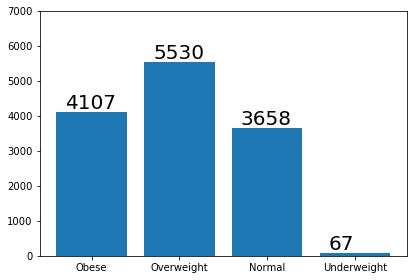

In [23]:
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.85,0.85])
x = ['Obese', 'Overweight', 'Normal', 'Underweight']
y = [ob.sum(), ow.sum() - ob.sum(), bmi['Instance 0'].count() - (ow.sum() + uw.sum()), uw.sum()]
ax.bar(x, y)
axes = plt.gca()
axes.set_ylim([0,7000])
xlocs, xlabs = plt.xticks()
xlocs=[i+1 for i in range(0,4)]
for i, v in enumerate(y):
    ax.text(xlocs[i] - 1.3, v + 100, str(v), fontsize = 20)
plt.savefig("Covid_information_bmi.png")

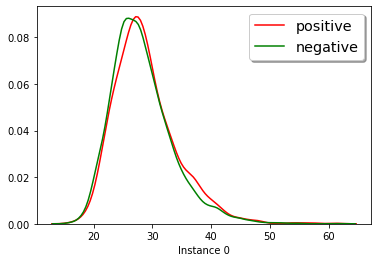

<Figure size 432x288 with 0 Axes>

In [24]:
#BMI distribution in covid positive and negative
ax=sns.distplot(bmi['Instance 0'][bmi['eid'].isin(eid_positive)], color='red',label='positive',hist=False)
ax=sns.distplot(bmi['Instance 0'][~bmi['eid'].isin(eid_positive)],color='green',label='negative',hist=False)
legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')

plt.show()
plt.savefig("Covid_BMI_distribution.png")

In [25]:
#in the figure, for subjects with BMI>5, they may have significant increase of risk, then we can define >35 as severe ob
numberPositive_nr=bmi['eid'][bmi['eid'].isin(eid_positive)][(bmi['Instance 0']>=18.5) & (bmi['Instance 0']<25)].count()
numberNegative_nr=bmi['eid'][~bmi['eid'].isin(eid_positive)][(bmi['Instance 0']>=18.5) & (bmi['Instance 0']<25)].count()

numberPositive_ow=bmi['eid'][bmi['eid'].isin(eid_positive)][(bmi['Instance 0']>=25) & (bmi['Instance 0']<30)].count()
numberNegative_ow=bmi['eid'][~bmi['eid'].isin(eid_positive)][(bmi['Instance 0']>=25) & (bmi['Instance 0']<30)].count()
                                                     
numberPositive_ob=bmi['eid'][bmi['eid'].isin(eid_positive)][(bmi['Instance 0']>=30) & (bmi['Instance 0']<35)].count()
numberNegative_ob=bmi['eid'][~bmi['eid'].isin(eid_positive)][(bmi['Instance 0']>=30) & (bmi['Instance 0']<35)].count()  

numberPositive_so=bmi['eid'][bmi['eid'].isin(eid_positive)][bmi['Instance 0']>=35].count()
numberNegative_so=bmi['eid'][~bmi['eid'].isin(eid_positive)][bmi['Instance 0']>=35].count()
                                                     
numberPositive_uw=bmi['eid'][bmi['eid'].isin(eid_positive)][bmi['Instance 0']<18.5].count()
numberNegative_uw=bmi['eid'][~bmi['eid'].isin(eid_positive)][bmi['Instance 0']<18.5].count()

print('BMI\t\tpositive\tnegative')
print('Underweight\t{}       \t{}'.format(numberPositive_uw,numberNegative_uw))
print('Normal     \t{}      \t{}'.format(numberPositive_nr,numberNegative_nr))
print('Overweight \t{}      \t{}'.format(numberPositive_ow,numberNegative_ow))
print('Obese      \t{}      \t{}'.format(numberPositive_ob,numberNegative_ob))
print('SevereOb   \t{}      \t{}'.format(numberPositive_so,numberNegative_so))

#odd and p compare to normal group
odd, p = stats.fisher_exact([[numberPositive_uw, numberNegative_uw], [numberPositive_nr, numberNegative_nr]])
print('The odd ration of infection with underweight to infection with normal weight is {} and p value is {}'.format(odd,p))

odd, p = stats.fisher_exact([[numberPositive_ow, numberNegative_ow], [numberPositive_nr, numberNegative_nr]])
print('The odd ration of infection with overweight to infection with normal weight is {} and p value is {}'.format(odd,p))

odd, p = stats.fisher_exact([[numberPositive_ob, numberNegative_ob], [numberPositive_nr, numberNegative_nr]])
print('The odd ration of infection with obese to infection with normal weight is {} and p value is {}'.format(odd,p))

odd, p = stats.fisher_exact([[numberPositive_so, numberNegative_so], [numberPositive_nr, numberNegative_nr]])
print('The odd ration of infection with severe obese to infection with normal weight is {} and p value is {}'.format(odd,p))

BMI		positive	negative
Underweight	7       	60
Normal     	389      	3269
Overweight 	692      	4837
Obese      	339      	2421
SevereOb   	204      	1144
The odd ration of infection with underweight to infection with normal weight is 0.9804198800342759 and p value is 1.0
The odd ration of infection with overweight to infection with normal weight is 1.202251496471341 and p value is 0.006052381207479848
The odd ration of infection with obese to infection with normal weight is 1.1767121236736398 and p value is 0.04256480994314843
The odd ration of infection with severe obese to infection with normal weight is 1.4985438725798623 and p value is 2.1308033246654124e-05


#### Revisit counts

In [26]:
print("There were only {} patients did a first repeat assessment visit, {} patients did the second and {} patients did the third; Out of all of these returning patients, the average bmis are respectively {}, {} and {}.".format(bmi['Instance 1'].count(), bmi['Instance 2'].count(), bmi['Instance 3'].count(), bmi['Instance 1'].mean(), bmi['Instance 2'].mean(), bmi['Instance 3'].mean()))

There were only 498 patients did a first repeat assessment visit, 1057 patients did the second and 52 patients did the third; Out of all of these returning patients, the average bmis are respectively 28.034085943775125, 27.42890671712396 and 25.566469230769233.


### Data-Field 20116 : Smoking Status

In [31]:
#smoking status, using first survey value
data['20116-0.0'].unique()

array([ 0.,  2.,  1., -3., nan])

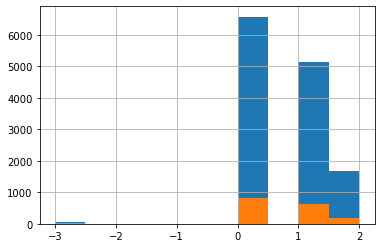

In [37]:
smoking_all=data['20116-0.0'].hist()
smoking_positive=data['20116-0.0'][data['eid'].isin(eid_positive)].hist()

In [43]:
infection_positive_never=data['eid'][data['20116-0.0']==0][data['eid'].isin(eid_positive)].count()
infection_negative_never=data['eid'][data['20116-0.0']==0][~data['eid'].isin(eid_positive)].count()

infection_positive_previous=data['eid'][data['20116-0.0']==1][data['eid'].isin(eid_positive)].count()
infection_negative_previous=data['eid'][data['20116-0.0']==1][~data['eid'].isin(eid_positive)].count()

infection_positive_current=data['eid'][data['20116-0.0']==2][data['eid'].isin(eid_positive)].count()
infection_negative_current=data['eid'][data['20116-0.0']==2][~data['eid'].isin(eid_positive)].count()

print('Smoking_status\tpositive\tnegative')
print('Never     \t{}       \t{}'.format(infection_positive_never,infection_negative_never))
print('Previous     \t{}      \t{}'.format(infection_positive_previous,infection_negative_previous))
print('Current \t{}      \t{}'.format(infection_positive_current,infection_negative_current))


#odd and p compare to never smoking group
odd, p = stats.fisher_exact([[infection_positive_previous,infection_negative_previous], [infection_positive_never,infection_negative_never]])
print('The odd ration of infection with previous smoking to infection with never smoking is {} and p value is {}'.format(odd,p))

odd, p = stats.fisher_exact([[infection_positive_current,infection_negative_current], [infection_positive_never,infection_negative_never]])
print('The odd ration of infection with current smoking to infection with never smoking is {} and p value is {}'.format(odd,p))


Smoking_status	positive	negative
Never     	806       	5774
Previous     	640      	4505
Current 	186      	1488
The odd ration of infection with previous smoking to infection with never smoking is 1.0177167360225612 and p value is 0.755671613966634
The odd ration of infection with current smoking to infection with never smoking is 0.8954714640198511 and p value is 0.20687127442376438


### Data-Field 20117 : Alcohol drinker status

In [24]:
#drinking status, using first survey value
data['20117-0.0'].unique()

array([ 2.,  1.,  0., -3., nan])

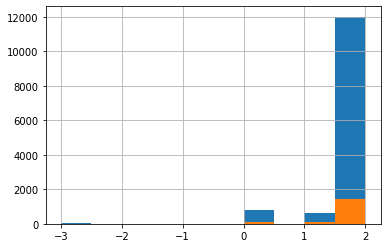

In [21]:
smoking_all=data['20117-0.0'].hist()
smoking_positive=data['20117-0.0'][data['eid'].isin(eid_positive)].hist()

In [23]:
infection_positive_never=data['eid'][data['20117-0.0']==0][data['eid'].isin(eid_positive)].count()
infection_negative_never=data['eid'][data['20117-0.0']==0][~data['eid'].isin(eid_positive)].count()

infection_positive_previous=data['eid'][data['20117-0.0']==1][data['eid'].isin(eid_positive)].count()
infection_negative_previous=data['eid'][data['20117-0.0']==1][~data['eid'].isin(eid_positive)].count()

infection_positive_current=data['eid'][data['20117-0.0']==2][data['eid'].isin(eid_positive)].count()
infection_negative_current=data['eid'][data['20117-0.0']==2][~data['eid'].isin(eid_positive)].count()

print('Drinking_status\tpositive\tnegative')
print('Never     \t{}       \t{}'.format(infection_positive_never,infection_negative_never))
print('Previous     \t{}      \t{}'.format(infection_positive_previous,infection_negative_previous))
print('Current \t{}      \t{}'.format(infection_positive_current,infection_negative_current))


#odd and p compare to never smoking group
odd, p = stats.fisher_exact([[infection_positive_previous,infection_negative_previous], [infection_positive_never,infection_negative_never]])
print('The odd ration of infection with previous drinking to infection with never drink alcohol is {} and p value is {}'.format(odd,p))

odd, p = stats.fisher_exact([[infection_positive_current,infection_negative_current], [infection_positive_never,infection_negative_never]])
print('The odd ration of infection with current drinking to infection with never drink alcohol is {} and p value is {}'.format(odd,p))


Drinking_status	positive	negative
Never     	125       	648
Previous     	83      	570
Current 	1433      	10571
The odd ration of infection with previous drinking to infection with never drink alcohol is 0.7548631578947368 and p value is 0.07076890962344695
The odd ration of infection with current drinking to infection with never drink alcohol is 0.7027407057042853 and p value is 0.0007968476520775658


### Data-Field 22037 - 22039 : MET minutes per week for walking

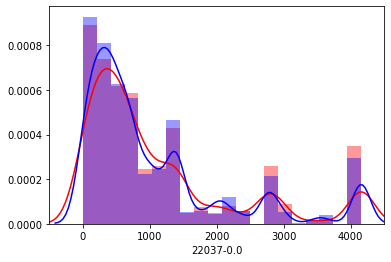

In [67]:
#MET minutes per week for walking
ax=sns.distplot(data['22037-0.0'][data['eid'].isin(eid_positive)], color='red',label='positive',hist=True,bins=20)
ax=sns.distplot(data['22037-0.0'][~data['eid'].isin(eid_positive)], color='blue',label='negative',hist=True,bins=20)
plt.xlim([-500, 4500])
plt.show()

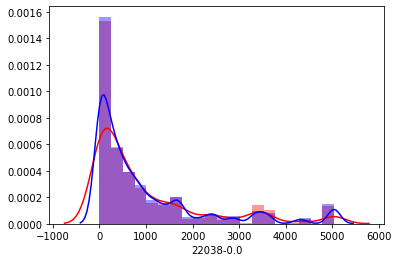

In [56]:
#MET minutes per week for moderate activity
ax=sns.distplot(data['22038-0.0'][data['eid'].isin(eid_positive)], color='red',label='positive',hist=True,bins=20)
ax=sns.distplot(data['22038-0.0'][~data['eid'].isin(eid_positive)], color='blue',label='negative',hist=True,bins=20)
plt.show()

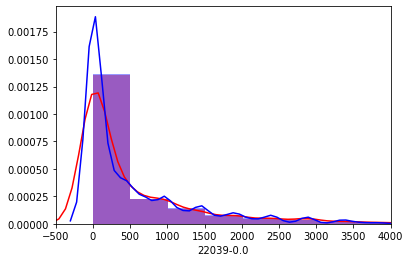

In [64]:
#MET minutes per week for vigorous activity
ax=sns.distplot(data['22039-0.0'][data['eid'].isin(eid_positive)], color='red',label='positive',hist=True,bins=20)
ax=sns.distplot(data['22039-0.0'][~data['eid'].isin(eid_positive)], color='blue',label='negative',hist=True,bins=20)
plt.xlim([-500, 4000])
plt.show()

### Data-Field 22601

In [27]:
filter_col22601 = [col for col in data if col.startswith('22601')]
filter_col22601.insert(0, 'eid')
filter_col22601

['eid',
 '22601-0.0',
 '22601-0.1',
 '22601-0.2',
 '22601-0.3',
 '22601-0.4',
 '22601-0.5',
 '22601-0.6',
 '22601-0.7',
 '22601-0.8',
 '22601-0.9',
 '22601-0.10',
 '22601-0.11',
 '22601-0.12',
 '22601-0.13',
 '22601-0.14',
 '22601-0.15',
 '22601-0.16',
 '22601-0.17',
 '22601-0.18',
 '22601-0.19',
 '22601-0.20',
 '22601-0.21',
 '22601-0.22',
 '22601-0.23',
 '22601-0.24',
 '22601-0.25',
 '22601-0.26',
 '22601-0.27',
 '22601-0.28',
 '22601-0.29',
 '22601-0.30',
 '22601-0.31',
 '22601-0.32',
 '22601-0.33',
 '22601-0.34',
 '22601-0.35',
 '22601-0.36',
 '22601-0.37',
 '22601-0.38',
 '22601-0.39']

In [28]:
employment = data[filter_col22601]
display(employment)

,eid,22601-0.0,22601-0.1,22601-0.2,22601-0.3,22601-0.4,22601-0.5,22601-0.6,22601-0.7,22601-0.8,...,22601-0.30,22601-0.31,22601-0.32,22601-0.33,22601-0.34,22601-0.35,22601-0.36,22601-0.37,22601-0.38,22601-0.39
0,1000011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1001244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1001283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1001505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1001772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13497,6021157,21233041.0,21233041.0,11323222.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13498,6022249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13499,6022684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13500,6023646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Vitamin

In [43]:
filter_vitamin = [col for col in data if col.startswith(('20084','100012', '100013', '100015', '100021', '100025', '104670'))]
filter_vitamin.insert(0, 'eid')
filter_vitamin

['eid',
 '20084-0.0',
 '20084-0.1',
 '20084-0.2',
 '20084-0.3',
 '20084-0.4',
 '20084-0.5',
 '20084-0.6',
 '20084-0.7',
 '20084-0.8',
 '20084-0.9',
 '20084-0.10',
 '20084-0.11',
 '20084-0.12',
 '20084-0.13',
 '20084-0.14',
 '20084-0.15',
 '20084-0.16',
 '20084-0.17',
 '20084-0.18',
 '20084-0.19',
 '20084-0.20',
 '20084-1.0',
 '20084-1.1',
 '20084-1.2',
 '20084-1.3',
 '20084-1.4',
 '20084-1.5',
 '20084-1.6',
 '20084-1.7',
 '20084-1.8',
 '20084-1.9',
 '20084-1.10',
 '20084-1.11',
 '20084-1.12',
 '20084-1.13',
 '20084-1.14',
 '20084-1.15',
 '20084-1.16',
 '20084-1.17',
 '20084-1.18',
 '20084-1.19',
 '20084-1.20',
 '20084-2.0',
 '20084-2.1',
 '20084-2.2',
 '20084-2.3',
 '20084-2.4',
 '20084-2.5',
 '20084-2.6',
 '20084-2.7',
 '20084-2.8',
 '20084-2.9',
 '20084-2.10',
 '20084-2.11',
 '20084-2.12',
 '20084-2.13',
 '20084-2.14',
 '20084-2.15',
 '20084-2.16',
 '20084-2.17',
 '20084-2.18',
 '20084-2.19',
 '20084-2.20',
 '20084-3.0',
 '20084-3.1',
 '20084-3.2',
 '20084-3.3',
 '20084-3.4',
 '20084

In [44]:
vitamin = data[filter_vitamin]
display(vitamin)

,eid,20084-0.0,20084-0.1,20084-0.2,20084-0.3,20084-0.4,20084-0.5,20084-0.6,20084-0.7,20084-0.8,...,100025-0.0,100025-1.0,100025-2.0,100025-3.0,100025-4.0,104670-0.0,104670-1.0,104670-2.0,104670-3.0,104670-4.0
0,1000011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19.73,NaN,5.99,NaN,NaN,0.0,NaN,0.0,NaN,NaN
1,1001244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,16.87,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2,1001283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1001505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1001772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13497,6021157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,14.55,NaN,NaN,NaN,NaN,0.0,NaN
13498,6022249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13499,6022684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13500,6023646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
vitamin = vitamin.dropna(axis='columns', how = 'all')

#### Get odd ratios and p values of infection rates based on each eupplement options

In [51]:
filter_200840 = [col for col in vitamin if col.startswith('20084-0')]
filter_200840.insert(0, 'eid')

In [53]:
vitamin0 = vitamin[filter_20084]
vitamin0.count()

eid           13502
20084-0.0       704
20084-0.1       438
20084-0.2       229
20084-0.3       127
20084-0.4        73
20084-0.5        39
20084-0.6        19
20084-0.7        13
20084-0.8        12
20084-0.9         8
20084-0.10        4
20084-0.11        4
20084-0.12        4
20084-0.13        3
20084-0.14        3
20084-0.15        2
20084-0.16        1
20084-0.17        1
20084-0.18        1
dtype: int64

In [56]:
coding74 = pd.read_csv("../NSinternship/data_coding/coding74.tsv", sep="\t")
coding74

,coding,meaning
0,468,Multivitamin
1,469,Multivitamin with iron
2,470,Multivitamin with calcium
3,471,Multivitamin with multimineral
4,472,Fish oil
5,473,Glucosamine/chondroitin
6,474,Evening primrose
7,475,Vitamin A
8,476,Vitamin B6
9,477,Vitamin B12


In [123]:
infection_positive_multivit_iron = 0
infection_negative_multivit_iron = 0
infection_positive_multivit_cal = 0
infection_negative_multivit_cal = 0
infection_positive_multivit_multimin = 0
infection_negative_multivit_multimin = 0
infection_positive_fishoil = 0
infection_negative_fishoil = 0
infection_positive_gluc = 0
infection_negative_gluc = 0
infection_positive_even_prim = 0
infection_negative_even_prim = 0
infection_positive_vita = 0
infection_negative_vita = 0
infection_positive_vitb6 = 0
infection_negative_vitb6 = 0
infection_positive_vitb12 = 0
infection_negative_vitb12 = 0
infection_positive_vitc = 0
infection_negative_vitc = 0
infection_positive_vitd = 0
infection_negative_vitd = 0
infection_positive_vite = 0
infection_negative_vite = 0

# Multivitamin
infection_positive_multivit = vitamin0['eid'][vitamin0['20084-0.0'] == 468][data['eid'].isin(eid_positive)].count()
infection_negative_multivit = vitamin0['eid'][vitamin0['20084-0.0'] == 468][~data['eid'].isin(eid_positive)].count()

# Multivitamin with iron
for (i, columnData) in vitamin0.iteritems():
    infection_positive_multivit_iron += vitamin0['eid'][vitamin0[i] == 469][data['eid'].isin(eid_positive)].count()
    infection_negative_multivit_iron += vitamin0['eid'][vitamin0[i] == 469][~data['eid'].isin(eid_positive)].count()

# Multivitamin with calcium
for (i, columnData) in vitamin0.iteritems():
    infection_positive_multivit_cal += vitamin0['eid'][vitamin0[i] == 470][data['eid'].isin(eid_positive)].count()
    infection_negative_multivit_cal += vitamin0['eid'][vitamin0[i] == 470][~data['eid'].isin(eid_positive)].count()

# Multivitamin with multimineral
for (i, columnData) in vitamin0.iteritems():
    infection_positive_multivit_multimin += vitamin0['eid'][vitamin0[i] == 471][data['eid'].isin(eid_positive)].count()
    infection_negative_multivit_multimin += vitamin0['eid'][vitamin0[i] == 471][~data['eid'].isin(eid_positive)].count()

# Fish oil
for (i, columnData) in vitamin0.iteritems():
    infection_positive_fishoil += vitamin0['eid'][vitamin0[i] == 472][data['eid'].isin(eid_positive)].count()
    infection_negative_fishoil += vitamin0['eid'][vitamin0[i] == 472][~data['eid'].isin(eid_positive)].count()
    
# Glucosamine/chondroitin
for (i, columnData) in vitamin0.iteritems():
    infection_positive_gluc += vitamin0['eid'][vitamin0[i] == 473][data['eid'].isin(eid_positive)].count()
    infection_negative_gluc += vitamin0['eid'][vitamin0[i] == 473][~data['eid'].isin(eid_positive)].count()
    
# Evening primrose
for (i, columnData) in vitamin0.iteritems():
    infection_positive_even_prim += vitamin0['eid'][vitamin0[i] == 474][data['eid'].isin(eid_positive)].count()
    infection_negative_even_prim += vitamin0['eid'][vitamin0[i] == 474][~data['eid'].isin(eid_positive)].count()
    
# Vitamin A
for (i, columnData) in vitamin0.iteritems():
    infection_positive_vita += vitamin0['eid'][vitamin0[i] == 475][data['eid'].isin(eid_positive)].count()
    infection_negative_vita += vitamin0['eid'][vitamin0[i] == 475][~data['eid'].isin(eid_positive)].count()
    
# Vitamin B6
for (i, columnData) in vitamin0.iteritems():
    infection_positive_vitb6 += vitamin0['eid'][vitamin0[i] == 476][data['eid'].isin(eid_positive)].count()
    infection_negative_vitb6 += vitamin0['eid'][vitamin0[i] == 476][~data['eid'].isin(eid_positive)].count()
    
# Vitamin B12
for (i, columnData) in vitamin0.iteritems():
    infection_positive_vitb12 += vitamin0['eid'][vitamin0[i] == 477][data['eid'].isin(eid_positive)].count()
    infection_negative_vitb12 += vitamin0['eid'][vitamin0[i] == 477][~data['eid'].isin(eid_positive)].count()
    
# Vitamin C
for (i, columnData) in vitamin0.iteritems():
    infection_positive_vitc += vitamin0['eid'][vitamin0[i] == 478][data['eid'].isin(eid_positive)].count()
    infection_negative_vitc += vitamin0['eid'][vitamin0[i] == 478][~data['eid'].isin(eid_positive)].count()
    
# Vitamin D
for (i, columnData) in vitamin0.iteritems():
    infection_positive_vitd += vitamin0['eid'][vitamin0[i] == 479][data['eid'].isin(eid_positive)].count()
    infection_negative_vitd += vitamin0['eid'][vitamin0[i] == 479][~data['eid'].isin(eid_positive)].count()
    
# Vitamin E
for (i, columnData) in vitamin0.iteritems():
    infection_positive_vite += vitamin0['eid'][vitamin0[i] == 480][data['eid'].isin(eid_positive)].count()
    infection_negative_vite += vitamin0['eid'][vitamin0[i] == 480][~data['eid'].isin(eid_positive)].count()
    

In [120]:
(vitamin0 == 473).sum()

eid             0
20084-0.0      54
20084-0.1     124
20084-0.2      48
20084-0.3       4
20084-0.4       3
20084-0.5       2
20084-0.6       0
20084-0.7       0
20084-0.8       0
20084-0.9       0
20084-0.10      0
20084-0.11      0
20084-0.12      0
20084-0.13      0
20084-0.14      0
20084-0.15      0
20084-0.16      0
20084-0.17      0
20084-0.18      0
dtype: int64

In [125]:
infection_negative_even_prim

82